In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

class Hipothesis:
    Zero = 0
    First = 1

In [2]:
L0 = multivariate_normal(mean=[0,0], cov= [[1,0],[0,1]])
L1 = multivariate_normal(mean=[2,2], cov= [[1,0],[0,1]])
P1 = 0.5
P2 = 0.5


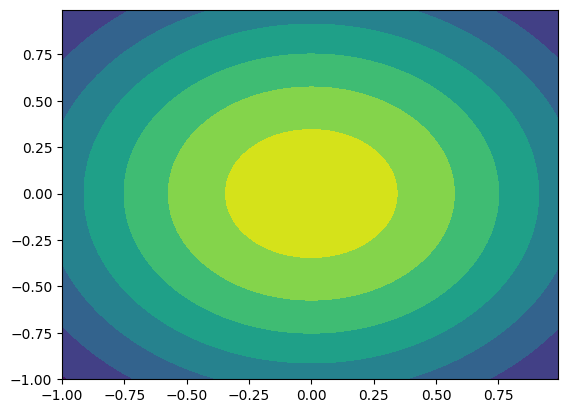

In [3]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
fig= plt.figure()
ax2 = fig.add_subplot(111)
ax2.contourf(x, y, L0.pdf(pos))

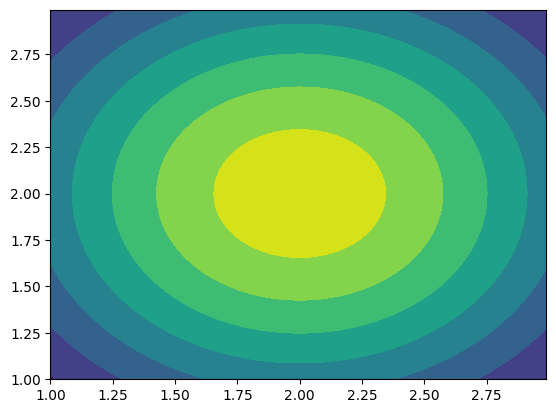

In [4]:
x, y = np.mgrid[1:3:.01, 1:3:.01]
pos = np.dstack((x, y))
fig= plt.figure()
ax2 = fig.add_subplot(111)
ax2.contourf(x, y, L1.pdf(pos))

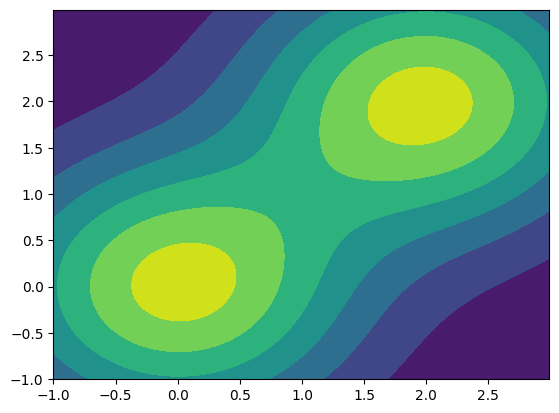

In [5]:
x, y = np.mgrid[-1:3:.01, -1:3:.01]
pos = np.dstack((x,y))
r1 = L0.pdf(pos)
r2 = L1.pdf(pos)
r = r1 + r2
fig= plt.figure()
ax2 = fig.add_subplot(111)
ax2.contourf(x, y, r)

In [3]:
def classify_bayes(L0,L1,point):
    return  L1.pdf(point)/L0.pdf(point)

In [6]:
def make_ROC(L0,L1):
    zero_hip = L0.rvs(10**5)
    first_hip = L1.rvs(10**5)
    ratio_first = np.array([classify_bayes(L0,L1,point) for point in first_hip])
    ratio_zero = np.array([classify_bayes(L0,L1,point) for point in zero_hip])
    x,y = [],[]
    threashold = 0
    step = 0.1
    while True:
        true_positive = np.sum(ratio_first > threashold)
        false_positive = np.sum(ratio_zero > threashold)
        true_negative = (10 ** 5) - false_positive
        false_negative = (10 **5) - true_positive
        alfa = false_positive/(10**5)
        beta = false_negative/(10**5)
        x.append(alfa)
        y.append(1 - beta)
        threashold += step
        if true_positive < 200:
            break
    plt.plot(x,y)
    plt.plot([0,1],[0,1])
    plt.xlabel('alfa')
    plt.ylabel('1 - beta')
    plt.title('ROC curve')

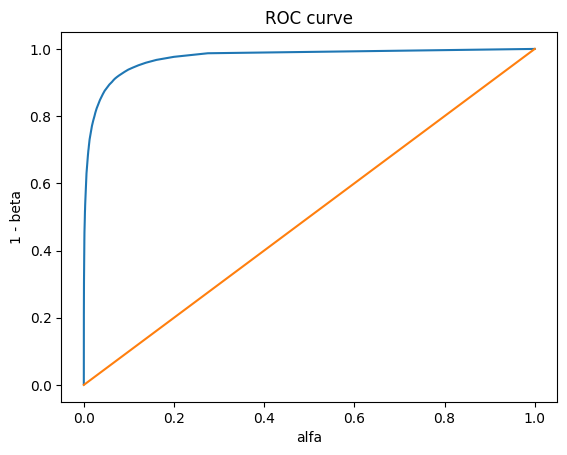

In [10]:
L0 = multivariate_normal(mean=[0,0], cov= [[1,0],[0,1]])
L1 = multivariate_normal(mean=[2,2], cov= [[1,0],[0,1]])
make_ROC(L0,L1)

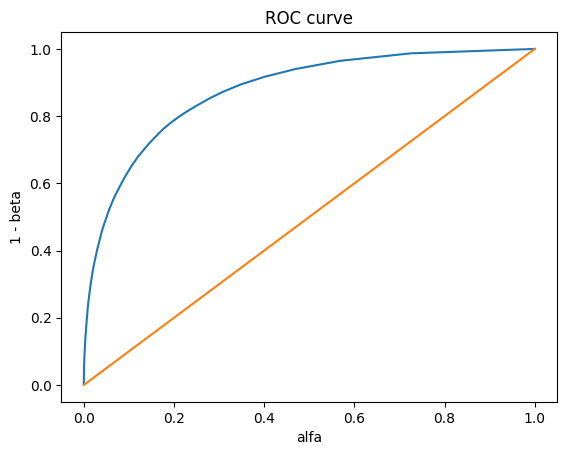

In [11]:
L0 = multivariate_normal(mean=[0,0], cov= [[3,0],[0,3]])
L1 = multivariate_normal(mean=[2,2], cov= [[3,0],[0,3]])
make_ROC(L0,L1)

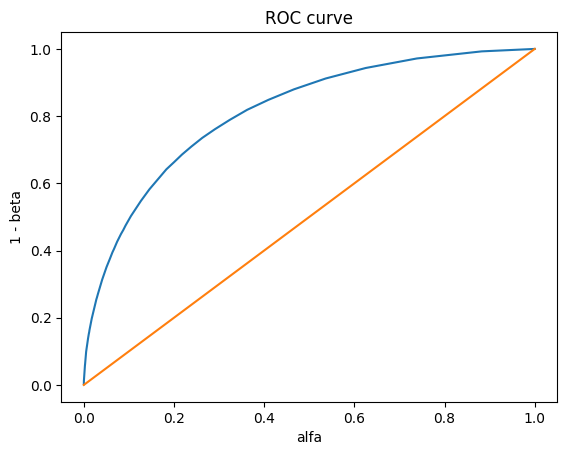

In [12]:
L0 = multivariate_normal(mean=[0,0], cov= [[5,0],[0,5]])
L1 = multivariate_normal(mean=[2,2], cov= [[5,0],[0,5]])
make_ROC(L0,L1)

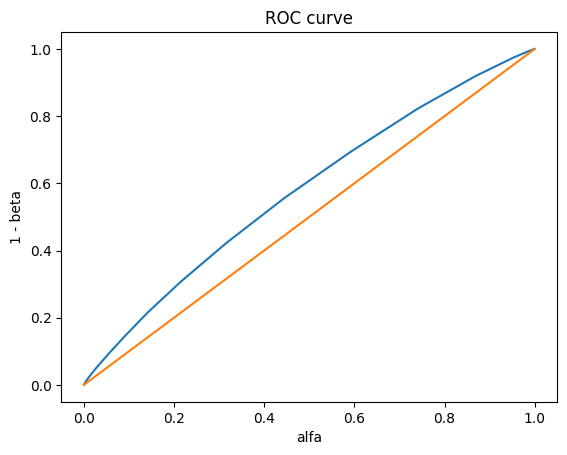

In [13]:
L0 = multivariate_normal(mean=[0,0], cov= [[100,0],[0,100]])
L1 = multivariate_normal(mean=[2,2], cov= [[100,0],[0,100]])
make_ROC(L0,L1)

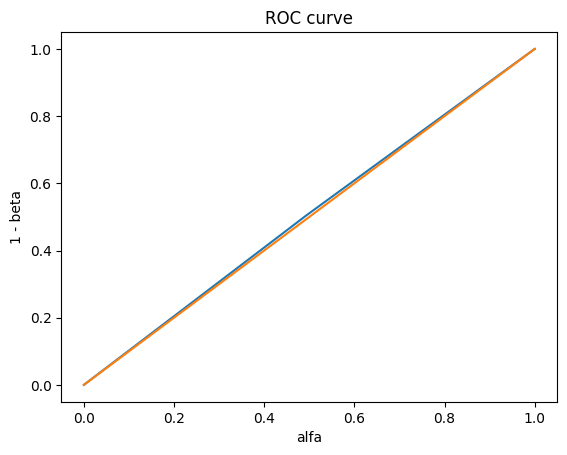

In [7]:
L0 = multivariate_normal(mean=[0,0], cov= [[10000,0],[0,10000]])
L1 = multivariate_normal(mean=[2,2], cov= [[10000,0],[0,10000]])
make_ROC(L0,L1)

In [17]:
def check_dist():
    x = []
    y = []
    for i in range(0,100,1):
        L0 = multivariate_normal(mean=[0,0], cov= [[1,0],[0,1]])
        L1 = multivariate_normal(mean=[i/10,i/10], cov= [[1,0],[0,1]])
        zero_hip = L0.rvs(10**4)
        first_hip = L1.rvs(10**4)
        ratio_first = np.array([classify_bayes(L0,L1,point) for point in first_hip])
        ratio_zero = np.array([classify_bayes(L0,L1,point) for point in zero_hip])
        true_positive = np.sum(ratio_first > 1)
        false_positive = np.sum(ratio_zero > 1)
        true_negative = (10 ** 4) - false_positive
        false_negative = (10 **4) - true_positive
        x.append(i)
        y.append((true_positive + true_negative)/(2 * 10 **4))
    plt.plot(x,y)
    plt.xlabel('distance in mean')
    plt.ylabel('part of corect classiefied samples')
    plt.title('dependency distance in mean and accurancy')
    plt.show()


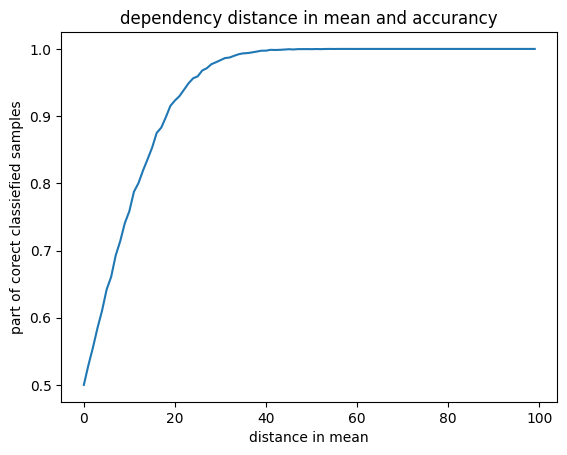

In [18]:
check_dist()